# Gradient Descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.

In [1]:
from sklearn.datasets import make_regression
import numpy as np

# n_samples = 4: This specefies the number of samples (rows) in the dataset. In this case, the dataset will have four rows.

n_features = 1: This specifies the number of features(columns) in the datasets. In this case, the dataset will have one feature column.

n_informative = 1: This specifies the number of informative features in the dataset. Informative features are those that are used to generate the target variable. In this case, there is only one informative feature column

noise = 80: This specifies the amount of noise to add to the target variable. In this case, the noise level is quite high, as it is set to 80.

random_state = 13: This sets the random seed for reproducibility of the generated dataset. Setting this parameter ensures that the same dataset can be generated again in the future if needed.

# What is random variaiton ? 


Random variation refers to the natural fluctuations or differences that occur in a system or process due to chance or randomness. These variations can be caused by a variety of factors, such as measurement errors, environmental conditions, or inherent randomness in the system itself.

For example, let's say you flip a fair coin 10 times. Each time you flip the coin, there is a 50% chance of getting heads and a 50% chance of getting tails. However, due to random variation, you might not get exactly 5 heads and 5 tails every time you flip the coin. In fact, you might get 6 heads and 4 tails, or 4 heads and 6 tails, or even 7 heads and 3 tails. These random fluctuations in the results are an example of random variation.

Random variation is an important concept in statistics and data analysis because it can affect the results of experiments or studies. By understanding and accounting for random variation, we can better estimate the true underlying relationships or patterns in the data and make more accurate conclusions.

# what is noise in data  ? 

In data analysis, noise refers to random variations or errors in the data that are not related to the underlying signal or phenomenon being measured. These random variations can be caused by a variety of factors, such as measurement errors, data collection errors, or natural variations in the data.

Noise can be a problem in data analysis because it can obscure the true relationship between variables or make it harder to detect patterns in the data. In some cases, it may be possible to remove or reduce noise through data cleaning or filtering techniques. In other cases, it may be necessary to account for the noise in the analysis by using statistical methods or models that are robust to noise.

In machine learning, adding noise to a dataset can be a way to simulate real-world data and improve the generalization performance of models. However, adding too much noise can also make it harder for models to learn the underlying patterns in the data, so it is important to strike a balance between noise and signal in the data.

In [2]:
x,y = make_regression(n_samples = 4, n_features = 1, n_informative = 1, n_targets = 1,
                     noise = 80, random_state = 13)

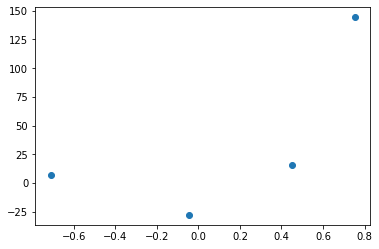

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [4]:
# Let's apply OLS
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

copy_X: This parameter specifies whether the data set, X, should be copied or not before fitting the linear regression model. By default, it is set to True, which means a copy of X will be created.

fit_intercept: This parameter specifies whether to calculate the intercept for this model. It is set to True by default, which means that the intercept will be calculated.

n_jobs: This parameter specifies the number of CPU cores to use for computation. By default, it is set to None, which means that the computation will be performed on a single core.

normalize: This parameter specifies whether the independent variables, X, should be normalized before fitting the linear regression model. It is set to False by default, which means that the data will not be normalized.

In summary, this code defines a Linear Regression model that will fit a straight line to a given set of data (X), and calculate the intercept and slope of the line to make predictions. The n_jobs parameter can be used to specify the number of CPU cores to use for computation, which can speed up the fitting process for large datasets.


In [7]:
LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None)

LinearRegression()

In [9]:
reg.coef_    # m slope

array([78.35063668])

In [10]:
reg.intercept_   # b

26.15963284313262

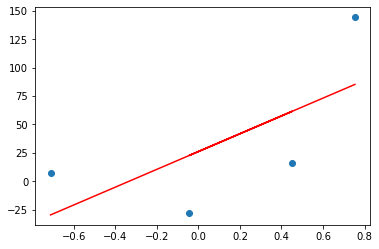

In [11]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color = 'red')

In [12]:
# Let's apply Gradient Descent assuming slope is constant = 78.35
# and Let's assume the starting value for intercept b=0
y_pred = ((78.35*x)+0).reshape(4)  # y=m*x+b

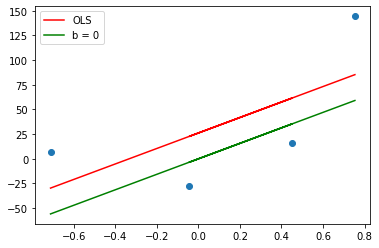

In [13]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), color = 'red', label = 'OLS')
plt.plot(x, y_pred, color = 'green', label = 'b = 0')
plt.legend()
plt.show()

# ravel() is a function in NumPy that returns a flattened array, i.e., it returns a contiguous flattened array in row-major (C-style) order. In other words, it returns a 1D array by flattening the input array, whether it is a multi-dimensional array or a one-dimensional array.

In [14]:
import numpy as np

arr = np.array([[1,2,3],[4,5,6]])

# using ravel() function to flatten the array
flattend_arr = arr.ravel()

print(arr)
# Output: [[1 2 3]
#          [4 5 6]]

print(flattend_arr)
# Output: [1 2 3 4 5 6]

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


In [17]:
m = 78.35
b = 0
loss_slope = -2*np.sum(y - m*x.ravel()-b)
loss_slope

-209.27763408209216

In [18]:
# Let's take learning rate = 0.1

lr = 0.1
step_size = loss_slope*lr
step_size

-20.927763408209216

In [19]:
# Calculating the new intercept
b = b-step_size
b

20.927763408209216

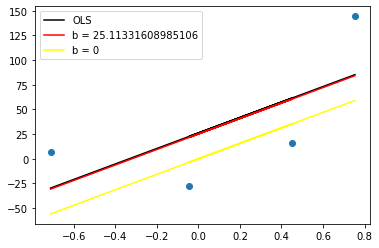

In [32]:
y_pred1 = ((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color = 'black', label = 'OLS')
plt.plot(x, y_pred1, color = 'red', label = 'b = {}'.format(b))
plt.plot(x, y_pred, color = 'yellow', label = 'b = 0')
plt.legend()
plt.show()

In [28]:
# Iteration -2

loss_slope = -2*np.sum(y - m*x.ravel() - b)
loss_slope

-41.85552681641843

In [29]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [30]:
b = b -step_size
b

25.11331608985106

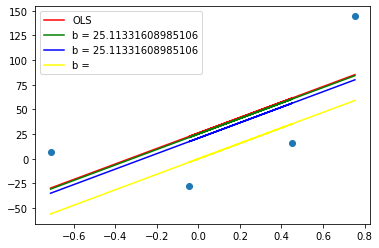

In [31]:
y_pred2 = ((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color = 'red', label = 'OLS')
plt.plot(x, y_pred2, color = 'green', label = 'b = {}'.format(b))
plt.plot(x, y_pred1, color = 'blue', label = 'b = {}'.format(b))
plt.plot(x, y_pred, color = 'yellow', label = 'b = ')
plt.legend()
plt.show()

In [33]:
# Iteration-3

loss_slope = 2*np.sum(y - m*x.ravel() - b)
loss_slope

8.371105363283675

In [34]:
step_size - loss_slope*lr
step_size

-4.185552681641844

In [35]:
b = b - step_size
b

29.298868771492906

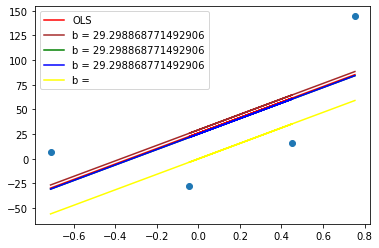

In [36]:
y_pred3 = ((78.35*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x, reg.predict(x), color = 'red', label = 'OLS')
plt.plot(x, y_pred3, color = 'brown', label = 'b = {}'.format(b))
plt.plot(x, y_pred2, color = 'green', label = 'b = {}'.format(b))
plt.plot(x, y_pred1, color = 'blue', label = 'b = {}'.format(b))
plt.plot(x, y_pred, color = 'yellow', label = 'b = ')
plt.legend()
plt.show()

# Now we use epochs

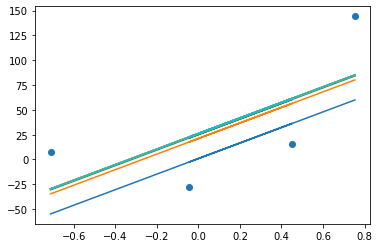

In [39]:
b = -100
m = 78.35
lr = 0.1

epochs = 10
for i in range(epochs):
    loss_slope = -2*np.sum(y - m*x.ravel() - b)
    b = b - (lr*loss_slope)
    
    y_pred = m*x+b
    plt.plot(x, y_pred)

plt.scatter(x,y)

# Now this time to check both on m and b

In [40]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [42]:
x,y = make_regression(n_samples = 100, n_features = 1,
                     n_informative = 1, n_targets = 1, noise = 20, random_state = 13)

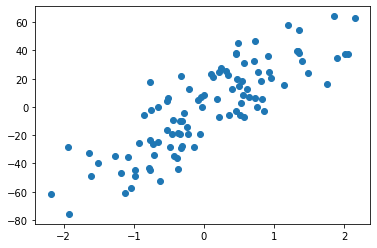

In [43]:
plt.scatter(x,y)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [45]:
lr = LinearRegression()

In [48]:
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [50]:
# np.mean(cross_val_score(lr, x, y, scoring = 'r2', cv = 10))

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6345158782661013

In [59]:
class GDRegressor : 
    def __init__(self, learning_rate, epochs) :
        self.m = 100  # we can start any number as like m =0
        self.b = -120  # we can start any number as like b = 1
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, x, y):
        # Calculate the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y - self.m*x.ravel() - self.b)
            loss_slope_m = -2*np.sum((y - self.m*x.ravel() - self.b)*x.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.b, self.m)
    
    def predict(self, x):
        return self.m * x + self.b

In [60]:
gd = GDRegressor(0.001, 100)

In [61]:
gd.fit(x_train, y_train)

-2.2710234077993587 28.12598618006269


In [62]:
# gd.predict(x)

In [63]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.634515826773629